In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# eda

In [14]:
meta = pd.read_csv('metadata.csv')

In [15]:
train = pd.read_csv('ratings-train.csv') #평점정보

In [16]:
meta.head() 
# running_min : -1? 크롤링 삑사리거나 상영시간 정보가 없거나 

,itemid,title,genres,country,running_min
0,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
1,42858,본 얼티메이텀 (2007),액션,미국,-1
2,121058,어느 가족 (2018),드라마,일본,121
3,4285,펀치 드렁크 러브 (2002),코미디,미국,95
4,36948,자토이치 (2003),액션/시대극,일본,115


In [17]:
train.head() #실제 다음 유저 아이디, 영화 아이디, 부여한 평점 (0-10점까지)

,userid,itemid,rating
0,MVdyRkY=,55396,9
1,TzZqVQ==,55396,7
2,REI4WTI=,55396,9
3,bDJ4aA==,55396,7
4,QktyMw==,55396,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111786310>,
      dtype=object)

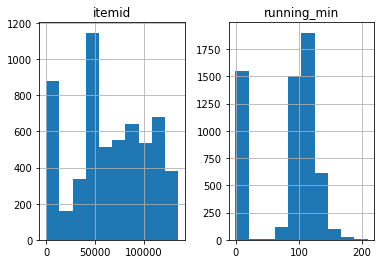

In [18]:
meta.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111786b10>,
      dtype=object)

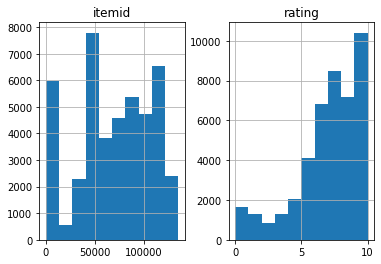

In [19]:
train.hist()

In [20]:
meta_genres=meta['genres'].unique()

In [21]:
meta_genres

array(['로맨스/멜로/코미디', '액션', '드라마', '코미디', '액션/시대극', 'SF/공포', '스릴러/판타지',
       '로맨스/멜로/드라마', '액션/무협', '무협/액션', '액션/SF', '미스터리/로맨스/멜로', '범죄/드라마',
       '드라마/로맨스/멜로', '범죄/액션', '범죄/스릴러', '코미디/드라마', '액션/시대극/스릴러',
       '미스터리/스릴러/드라마', '스릴러/드라마', '범죄/드라마/스릴러', 'SF/액션', '스릴러',
       '액션/무협/드라마', '액션/어드벤처', '애니메이션/코미디/로맨스/멜로', '로맨스/멜로/판타지',
       '로맨스/멜로/스릴러', '다큐멘터리', '액션/스릴러', '드라마/코미디', '로맨스/멜로', '드라마/미스터리',
       '어드벤처/드라마/서부', 'SF/드라마', '코미디/로맨스/멜로', '코미디/판타지/로맨스/멜로',
       '미스터리/판타지', '액션/서부', '드라마/스릴러', '전쟁', '코미디/가족', '액션/드라마', '드라마/가족',
       '미스터리', '애니메이션/드라마', '액션/전쟁/드라마', '코미디/어드벤처', '애니메이션/어드벤처',
       '가족/판타지', '범죄/미스터리/드라마', '판타지/어드벤처', '애니메이션/판타지/로맨스/멜로',
       '애니메이션/판타지/어드벤처', '어드벤처/판타지/공포/로맨스/멜로/스릴러/전쟁', '코미디/드라마/로맨스/멜로',
       '미스터리/스릴러', '시대극/드라마', '판타지/로맨스/멜로', '애니메이션/액션/가족', '애니메이션',
       '뮤지컬/드라마', '애니메이션/어드벤처/가족', '범죄/미스터리', '서부', '드라마/스릴러/SF',
       '애니메이션/액션/어드벤처', 'SF/어드벤처', '코미디/전쟁/시대극', '어드벤처/판타지/액션/SF',
       '드라마/범죄', '코미디/가족/애니메이션', '미스터리/공포', '액

In [22]:
from itertools import chain
list_of_lists = [[x, 0] for x in range(meta_genres)]
list_of_lists.head()

TypeError: only integer scalar arrays can be converted to a scalar index

In [32]:
mt=meta.merge(train, how='inner', on='itemid')
mt.head()

,itemid,title,genres,country,running_min,userid,rating
0,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121,MVdyRkY=,9
1,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121,TzZqVQ==,7
2,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121,REI4WTI=,9
3,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121,bDJ4aA==,7
4,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121,QktyMw==,7


In [33]:
# 사람들이 가장 평점을 높게 준 영화들 
mt.groupby('title')['rating'].mean().nlargest(100)

title
6 언더그라운드 (2019)         10.0
69세 (2019)              10.0
SAS: 레드 노티스 (2020)      10.0
VHS 3 (2014)            10.0
가시꽃 (2012)              10.0
                        ... 
안녕 히어로 (2016)           10.0
안티버스 (2016)             10.0
알 파치노의 뉴욕 광시곡 (1996)    10.0
앨리의 사랑 만들기 (1997)       10.0
앵그리스트맨 (2013)           10.0
Name: rating, Length: 100, dtype: float64

In [34]:
# 가장 많이 본 영화들 
mt.groupby('title').count().sort_values(by='userid',ascending=False)

,itemid,genres,country,running_min,userid,rating
title,,,,,,
기생충 (2019),117,117,117,117,117,117
어벤져스: 엔드게임 (2019),95,95,95,95,95,95
변호인 (2013),78,78,78,78,78,78
엑시트 (2019),76,76,76,76,76,76
극한직업 (2018),76,76,76,76,76,76
택시운전사 (2017),75,75,75,75,75,75
1987 (2017),73,73,73,73,73,73
조커 (2019),72,72,72,72,72,72
어벤져스: 인피니티 워 (2018),71,71,71,71,71,71


In [35]:
# 가장 많이 본 아이디
mt.groupby('userid').count().sort_values(by='rating',ascending=False)

,itemid,title,genres,country,running_min,rating
userid,,,,,,
MWNiOE0=,1543,1543,1542,1543,1543,1543
MkM2Mg==,1346,1346,1345,1346,1346,1346
WDBL,1251,1251,1250,1251,1251,1251
OGZ4SEs=,1250,1250,1249,1250,1250,1250
NHYxVUw=,1192,1192,1192,1192,1192,1192
MmZIMWY=,970,970,967,970,970,970
QVRCMXY=,848,848,848,848,848,848
RjVKVw==,741,741,741,741,741,741
MWtjT3o=,703,703,701,703,703,703


In [36]:
mt.groupby('userid').count().max()

itemid         1543
title          1543
genres         1542
country        1543
running_min    1543
rating         1543
dtype: int64

In [37]:
mt[mt['rating']==0].groupby(['itemid','title'])['rating'].count().sort_values(ascending=False)

itemid  title                    
119835  나랏말싸미 (2018)                 11
120834  걸캅스 (2018)                   11
105736  불한당: 나쁜 놈들의 세상 (2016)         7
111722  상류사회 (2018)                   6
120166  신과함께-인과 연 (2018)              5
                                     ..
96198   인투 더 포레스트 (2015)              1
96107   언컨셔스 (2015)                   1
95992   미씽: 사라진 여자 (2016)             1
95961   나는 사랑과 시간과 죽음을 만났다 (2016)     1
85330   여자의 정사 (2009)                 1
Name: rating, Length: 1235, dtype: int64

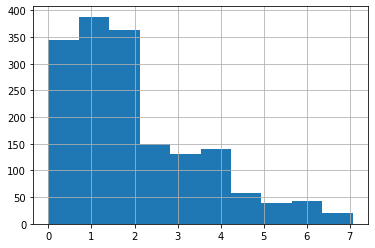

In [38]:
mt.groupby('userid')['rating'].std().hist()

In [39]:
pd.DataFrame(mt.groupby('title')['rating'].mean().sort_values(ascending=False)) 

,rating
title,
맨츄리안 캔디데이트 (2004),10.0
레전드 오브 더 네버비스트 (2014),10.0
오필리아 (2018),10.0
미성년 (2014),10.0
허니문 호텔 살인사건 (2016),10.0
공동정범 (2016),10.0
오토기리소우 (2001),10.0
사람들 (2017),10.0
내가 사는 세상 (2018),10.0


In [40]:
mt[mt['country']=='미국'].groupby('title')['rating'].mean().nlargest(50)

title
6 언더그라운드 (2019)                  10.0
VHS 3 (2014)                     10.0
결단의 3시 10분 (1957)                10.0
그녀는 날 싫어해 (2004)                 10.0
기타리스트: 열정을 부르는 선율 (2008)         10.0
나를 미치게 하는 여자 (2015)              10.0
나이브스 아웃 (2019)                   10.0
닥터 스트레인지 2                       10.0
더 메들러 (2015)                     10.0
더 와일디스트 드림 (2010)                10.0
더 우먼 인 더 윈도우 (2020)              10.0
라이프가드 (2013)                     10.0
람보 : 라스트 워 (2019)                10.0
러브, 사이먼 (2018)                   10.0
럭키 (2017)                        10.0
레전드 오브 더 네버비스트 (2014)            10.0
룸메이트 (2011)                      10.0
리틀 오데싸 (1994)                    10.0
마법에 걸린 사랑 (2007)                 10.0
맨, 우먼 & 칠드런 (2014)               10.0
맨츄리안 캔디데이트 (2004)                10.0
모리와 함께 한 화요일 (1999)              10.0
미녀 첩보원 D.E.B.S. (2004)           10.0
미드나잇 가든 (1997)                   10.0
박스트롤 (2014)                      10.0
버즈 오브 프레이(할리퀸의 황홀한 해방) (2020)    10.0
베이브는 외

In [66]:
mt[mt['country']=='미국'].groupby('title')['genres'].count().nlargest(50)

title
어벤져스: 엔드게임 (2019)             95
어벤져스: 인피니티 워 (2018)           71
알라딘 (2019)                    69
캡틴 마블 (2019)                  55
스파이더맨: 파 프롬 홈 (2019)          53
스파이더맨 : 홈커밍 (2017)            50
미션 임파서블: 폴아웃 (2018)           47
인터스텔라 (2014)                  47
닥터 스트레인지 (2016)               46
캡틴 아메리카: 시빌 워 (2016)          44
서치 (2018)                     43
쇼생크 탈출 (1994)                 43
블랙 팬서 (2018)                  41
존 윅 3: 파라벨룸 (2019)            41
원더 우먼 (2017)                  40
그래비티 (2013)                   39
베놈 (2018)                     39
토르 : 라그나로크 (2017)             39
겟 아웃 (2017)                   38
나를 찾아줘 (2014)                 38
마션 (2015)                     38
존 윅 (2014)                    38
로건 (2017)                     37
맨 인 더 다크 (2016)               37
앤트맨과 와스프 (2018)               37
어벤져스 (2012)                   37
라라랜드 (2016)                   36
분노의 질주: 홉스&쇼 (2019)           36
어벤져스 : 에이지 오브 울트론 (2015)      36
가디언즈 오브 갤럭시 (2014)            35
가디언즈

# 영화 추천 시스템
- 소비자𝑢가평점을남기지않은영화𝑖에대해예측 평점 𝑟ෞ 를 계산하는 문제
- 예측평점을계산할수있다면,예측평점이높은순으로추천 해주면 추천 시스템 완성!
- 평가 방법
    - • 오프라인 평가
    - • RMSE (Root Mean Square Error)
    - 𝑟 =사용자𝑢가영화𝑖에부여한실제평점 𝑢,𝑖 낮을수록 좋은 점수 (error)
    - 미리 준비된 validation 데이터(ratings-valid.csv)를 사용해 측정
    - Validation 데이터도 DataFrame으로 불러와주세요
- RMSE를 계산하는 rmse 함수를 만들어봅시다
-  expected: 여러분이 계산한 (userid, itemid, rating)이 들어있는 DataFrame
- answer: 정답 (userid, itemid, rating)이 들어있는 DataFrame
- Hint: pandas outer join # 사실 잘 쓰지 않은 join 이지만 여기서는 해야함


In [10]:
valid=pd.read_csv('ratings-valid.csv').sample(random_state=17,frac=0.2) 
# 랜덤 첫값을 정해주면 모든 컴퓨터에서 같은 값이 나옴_적당한 크기의 소수를 쓰는 데 보통 17을 많이 씀/frac(몇 %를 샘플링 할 거냐 )

In [11]:
valid.count()

userid    1057
itemid    1057
rating    1057
dtype: int64

In [42]:
valid.head()

,userid,itemid,rating
1000,NEpQdHA=,53983,9
3543,OTQzaFo=,108037,8
4826,M2p2QTk=,87427,7
4330,REhkazM=,95755,3
3635,MWNiOE0=,70107,7


In [43]:
valid.tail()

,userid,itemid,rating
2276,MmZIMWY=,107295,9
2086,NEpQdHA=,102301,8
4787,NEpQdHA=,124290,9
4187,OG12cnE=,118159,10
1640,MWNiOE0=,60319,5


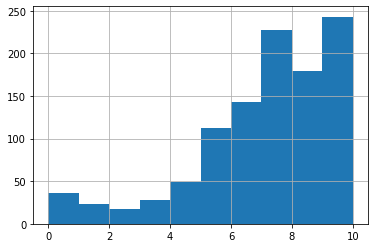

In [12]:
valid['rating'].hist()

In [91]:
expected = valid[1:10] 
answer = valid[:10]
# 우리가 가지고 있는 valid에서 각자 데이터를 대충 정해줌 
# (valid는 expected는 9개, answer은 10개 : 크기를 다르게 했을 때, 문제가 생기면 잘못된 수식임)
# 길이 크기가 다른 게 포인트!!! nan 값이 존재하니까, 요 두 데이터 셋을 아우터 조인함
# 그 후에 nan값을 fillna로 채워준 후, 길이를 맞춰주고 그 후에 x-y를 빼짐 
# 그 후엔 차이를 제곱하고, 평균값을 내고 root 씌워주면 된다. 

In [90]:
# expected = valid['rating'][1:10]
# answer = valid['rating'][:10]

In [80]:
# def rmse(expected, answer):
#     return np.sqrt(((expected - answer ) ** 2).mean())
# return np.sqrt(((predictions - targets) ** 2).mean())
# def rmse(predictions, targets):

#     differences = predictions - targets                       #the DIFFERENCEs.

#     differences_squared = differences ** 2                    #the SQUAREs of ^

#     mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

#     rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

#     return rmse_val    

In [109]:
# def rmse(expected, answer):
#     prepro = answer.merge(expected, how='outer', on='itemid').fillna(0)
#     diff = prepro['rating_x']- prepro['rating_y']
#     mse = diff ** 2 / len(diff)
#     rmse = mse.apply(lambda x: np.sqrt(x))
#     return sum(rmse)

In [113]:
rmse(expected,answer)

2.6076809620810595

In [110]:
# 선생님 코드
def rmse(expected, answer):
    joined = pd.merge(answer, expected, on=['userid', 'itemid'], how='left')
    joined['rating_y'] = joined['rating_y'].fillna(0)
    joined['square_error'] = (joined['rating_x'] - joined['rating_y']) ** 2
    return np.sqrt(joined['square_error'].mean())
# 선미님 코드 
# def rmse(expected, answer):
#     df = expected.merge(answer, on=['userid','itemid'], how='outer').fillna(0)
#     return np.sqrt(sum((df[ratinx_x']-df['rating_y'])**2)/len(df))

In [ ]:
# rmse 평가하기 

In [97]:
def predict(u,i): # 유저, 아이템아이디
    return 8.0 #8 리턴하는 함수 만들기 
expected = valid.copy()
expected.head() #여기에 들어있는 값을 예측하게 만들어야함

,userid,itemid,rating
1000,NEpQdHA=,53983,9
3543,OTQzaFo=,108037,8
4826,M2p2QTk=,87427,7
4330,REhkazM=,95755,3
3635,MWNiOE0=,70107,7


In [106]:
expected['rating'] = expected.apply(lambda row: predict(row['userid'],row['itemid']), axis=1 ) # 0 컬럼 단위, 1=row단위로 데이터가 들어옴 
# 지금은 8.0으로 다 넣기로 했으니까 위에서 8.0으로 리턴해주는 predict 넣어주기 

In [100]:
expected.head() # 다 8.0이 들어가 있음 

,userid,itemid,rating
1000,NEpQdHA=,53983,8.0
3543,OTQzaFo=,108037,8.0
4826,M2p2QTk=,87427,8.0
4330,REhkazM=,95755,8.0
3635,MWNiOE0=,70107,8.0


In [112]:
rmse(expected, valid) #8.0이 얼마나 괜찮은 값인지 볼까? 

2.7423239390279464

In [124]:
# train 데이터의 평균평점으로 넣어볼까? 
r_means = train['rating'].mean() #숫자가 많아질 수록 요런식으로 하나를 지정해줘서 넣는게 시간을 절약함 
def predict(u,i): 
    return r_means 
expected['rating'] = expected.apply(lambda row: predict(row['userid'],row['itemid']), axis=1 )
rmse(expected, valid)

2.418031954051125

In [131]:
# 모든 예측을 주어진 사용자의 평균 평점으로 계산하는 추천 로직 

# train.groupby('userid')['rating'].mean() # 난 이렇게 생각했는 데 아니었음, 주어진 사용자 라는 게 예측해야하는 사용자임
# 위처럼 하고 싶다면 
# train.groupby('userid')['rating'].mean().loc[u] #u를 찾아주는 게 포인트, 이걸 안쓰면 모든 유저에 대한 평균이 나옴, 이걸 하면 유저 아이디의 유저 평균값이 나옴
def predict(u,i): 
    return train[train['userid']==u]['rating'].mean()
expected['rating'] = expected.apply(lambda row: predict(row['userid'],row['itemid']), axis=1 )
rmse(expected, valid)

2.1909154513519242

In [130]:
# 모든 예측을 주어진 영화의 평균 평점으로 계산하는 추천 로직 
# 명작은 누가봐도 명작이다 
def predict(u,i): 
    return train[train['itemid']==i]['rating'].mean()
expected['rating'] = expected.apply(lambda row: predict(row['userid'],row['itemid']), axis=1 )
rmse(expected, valid)
# 유저 평균이 더 좋음 

2.237838086446809

# User-User Collaborative Filtering
- 1. 서로다른두소비자𝑢와𝑣에대해유사한정도를나 타내는 𝑠𝑖𝑚(𝑢, 𝑣) 함수를 정의해야 함
    - 유사도는 여러 가지를 쓸 수 있음 (Jaccard, Cosine)
- 2. 주어진소비자𝑢에대해비슷한소비자𝑘명(𝑈 )을 찾음 
- 3. 찾은 𝑘명의 소비자가 영화 𝑖에 대해 남긴 가중 평점을 계산해서 소비자 𝑢의 예측 평점(𝑟ෞ )으로 사용

### 1. 유사도함수𝑠𝑖𝑚𝑢,𝑣 
- Jaccard similarity

In [181]:
# 유사도 계산하는 함수를 먼저 만들자! 자카드 시뮬러리티(유저 u가 v랑 비슷한 영화를 많이 보면 두 유저가 비슷하다고 주장하는 가설)
# u가 본 평점을 남긴 영화 집합, 소비자 v가 평점을 남긴 영화 집합
# 합집합 중 교집합의 개수를 구하는 함수 만들기 
all_users = train['userid'].unique() #모든 유저 
i_set = {u: set(train[train['userid']==u]['itemid']) for u in all_users} # 모든 유저에 대한 set을 만들어주고 
def sim(u,v):
    #u = set(train[train['userid']==u]['itemid'])
    #v = set(train[train['userid']==v]['itemid'])
    u=i_set[u]
    v=i_set[v]
    cup = u|v #g합집합
    if len(cup)==0:
        return 0.0
    cap = u&v #교집합
    return len(cap)/ len(cup) #교집합/합집합 개수를 나눠준다 


In [182]:
sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

In [247]:
# 비슷한 영화를 소비한 k명의 소비자 u를 찾는 함수 만들기 
def similar_users(u, k):
    sims = sorted([(sim(u, v), v) for v in all_users if u != v], reverse=True)
    topk_users = [v for s, v in sims][:k]
    return pd.DataFrame(topk_users, columns=['userid'])
### 수민님 코드 
# def similar_users(u, k):
#     sim_list = []
#     for v in all_users:
#         sim_list.append([v, sim(u, v)])
#         sim_list = sorted(sim_list, key = lambda x: x[1], reverse=True)
#         topk = [v for s, v in sim_list][1:k+1]
#     return pd.DataFrame(topk, columns = ['similarity'])

In [ ]:
# 단계별로 보기 

In [241]:
u = 'TERhUA=='
k = 5
sims = [(sim(u,v),v) for v in all_users if u!=v]

In [242]:
sorted_sims = sorted(sims, reverse=True)

In [243]:
topk_users = [v for s,v in sorted_sims[:k]]

In [244]:
topk_users 

['YzkyQQ==', 'NGdmcVQ=', 'M2hETGQ=', 'V0NyaQ==', 'QTB5d0E=']

In [245]:
pd.DataFrame(topk_users , columns=['userid'])

,userid
0,YzkyQQ==
1,NGdmcVQ=
2,M2hETGQ=
3,V0NyaQ==
4,QTB5d0E=


In [250]:
# https://files.slack.com/files-pri/T9SHC5F9S-FPLH1TXA4/screenshot_from_2019-10-21_17-28-04.png

In [248]:
similar_users('TERhUA==', 5)

,userid
0,YzkyQQ==
1,NGdmcVQ=
2,M2hETGQ=
3,V0NyaQ==
4,QTB5d0E=


# 3. 소비자 u와 영화 i에 대한 영화 예측 평점을 만드는 함수 구연 

In [269]:
def predict(u, i):
    topk_users = similar_users(u, 5)
    topk_users['sim'] = topk_users.apply(lambda row: sim(u, row['userid']), axis=1)
    i_ratings = train[train['itemid'] == i]
    joined = pd.merge(topk_users, i_ratings, on='userid')
    joined['weighted_rating'] = joined['sim'] * joined['rating']
    return joined['weighted_rating'].sum() / joined['sim'].sum()

In [270]:
expected = valid.copy()
expected['rating'] = expected.apply(
    lambda row: predict(row['userid'], row['itemid']), axis=1)

rmse(expected, valid)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


4.4360709881776135

In [ ]:
# scikit-learn에 있는 함수들을 오늘 직접 구현해본거임 